## **Banking Market - Target**

**source :** https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets 
<br>

**Business Problem :** <br> 
The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. 
Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
<br>

**Objectives :** <br>
1. Identify the customers who are most likely to convert their deposit before the bank contacts them.
2. Recommend customers target based on exploratory data analysis.

### **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn important 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# for making pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# for machine learning model
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for handling imbalance dataset
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC

# for validation
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score,
                            ConfusionMatrixDisplay,
                            confusion_matrix, 
                            make_scorer)
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

from scipy.stats import randint


### **Import Dataset**

In [3]:
path = "D:\DATA SCIENCE\PROJECT\Banking-Market Target\datasets"

# import data
train = pd.read_csv((path + "/train.csv"), delimiter = ";")
test = pd.read_csv((path + "/test.csv"), delimiter = ";")

In [4]:
df = pd.concat([train, test])

### **1. Take a Quick Look at the Data Structure** 

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [7]:
# defining categorical and numerical columns
numerical_cols = list(df.describe().T.index)
categorical_cols = list(col for col in df.columns if col not in numerical_cols)

In [8]:
# numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,49732.0,40.957472,10.615008,18.0,33.0,39.0,48.0,95.0
balance,49732.0,1367.761562,3041.608766,-8019.0,72.0,448.0,1431.0,102127.0
day,49732.0,15.816315,8.315680,1.0,8.0,16.0,21.0,31.0
duration,49732.0,258.690179,257.743149,0.0,103.0,180.0,320.0,4918.0
campaign,49732.0,2.766549,3.099075,1.0,1.0,2.0,3.0,63.0
pdays,49732.0,40.158630,100.127123,-1.0,-1.0,-1.0,-1.0,871.0
previous,49732.0,0.576892,2.254838,0.0,0.0,0.0,0.0,275.0


In [9]:
# categorical data
df[categorical_cols].describe().T

,count,unique,top,freq
job,49732,12,blue-collar,10678
marital,49732,3,married,30011
education,49732,4,secondary,25508
default,49732,2,no,48841
housing,49732,2,yes,27689
loan,49732,2,no,41797
contact,49732,3,cellular,32181
month,49732,12,may,15164
poutcome,49732,4,unknown,40664
y,49732,2,no,43922


#### **1.1 Categorical Data**

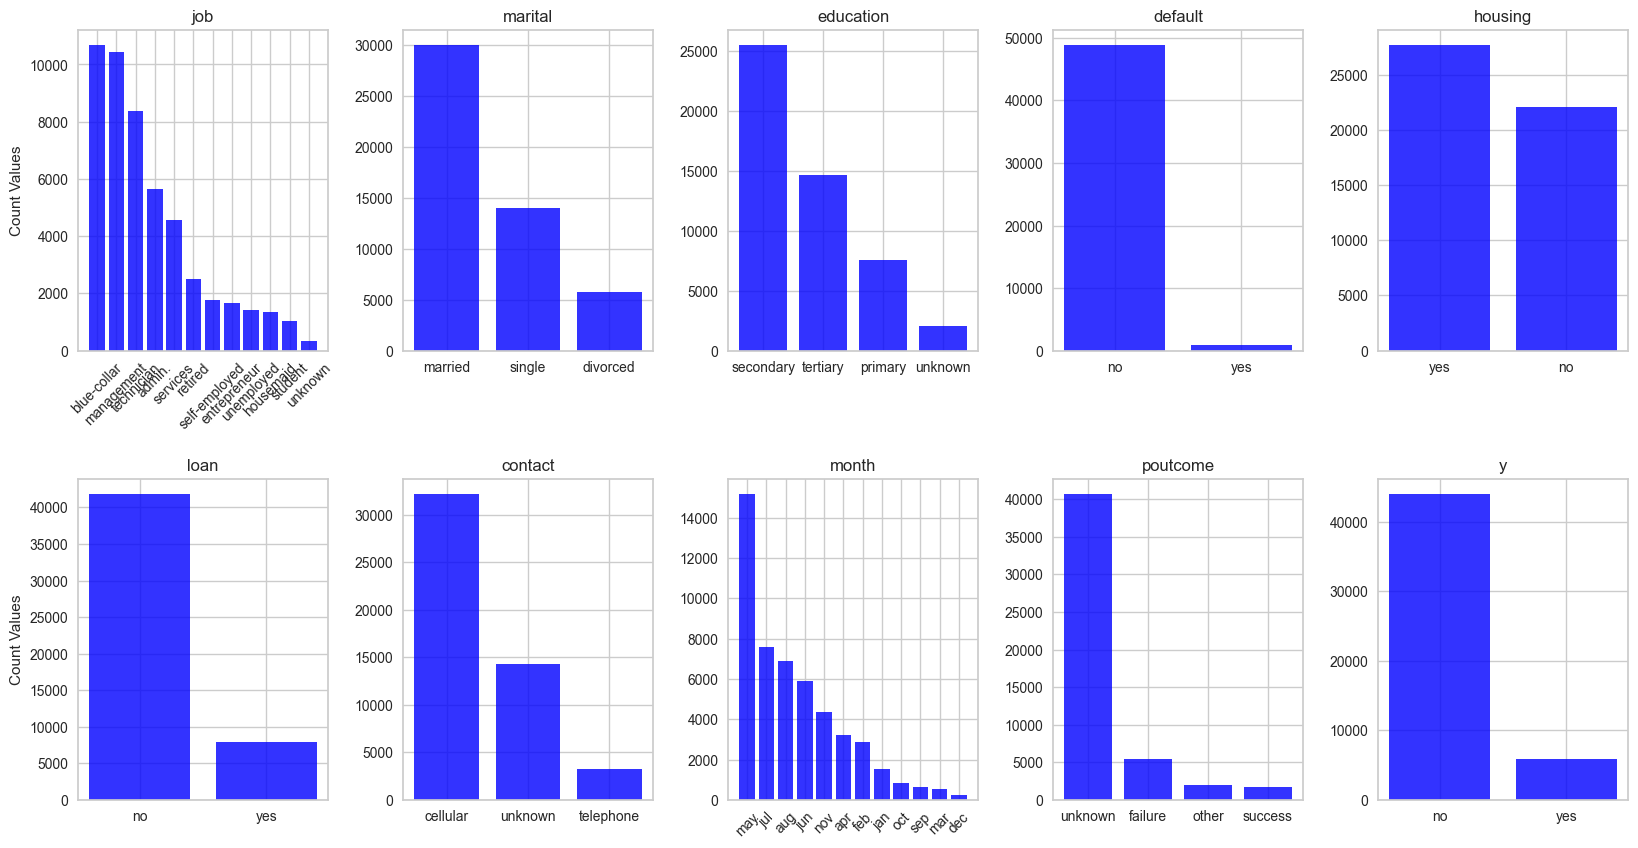

In [10]:
# set the size of the figure and the number of rows and columns for the subplots
num_rows, num_cols = 2, 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axs = axs.flatten()
# loop through the list of dataframes and create a bar graph for each one in a different subplot 
for i, col in enumerate(df[categorical_cols].columns):
    df_bar = df[col].value_counts().reset_index(name="value")

    axs[i].bar(df_bar["index"], df_bar["value"], color="blue", alpha=0.8)
    axs[i].set_title(col)

    if i == 0 or i == 5:
        axs[i].set_ylabel("Count Values")
    else:
        pass

    # rotate readable
    if col == "job" or col == "month": 
        axs[i].tick_params(axis="x", rotation=45)
    else:
        axs[i].tick_params(axis="x", rotation=0)
# adjust the layout of the subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

**note** <br> 
from above output, unknown value exist: job, education, contact, poutcome.

#### **1.2 Numerical Data**

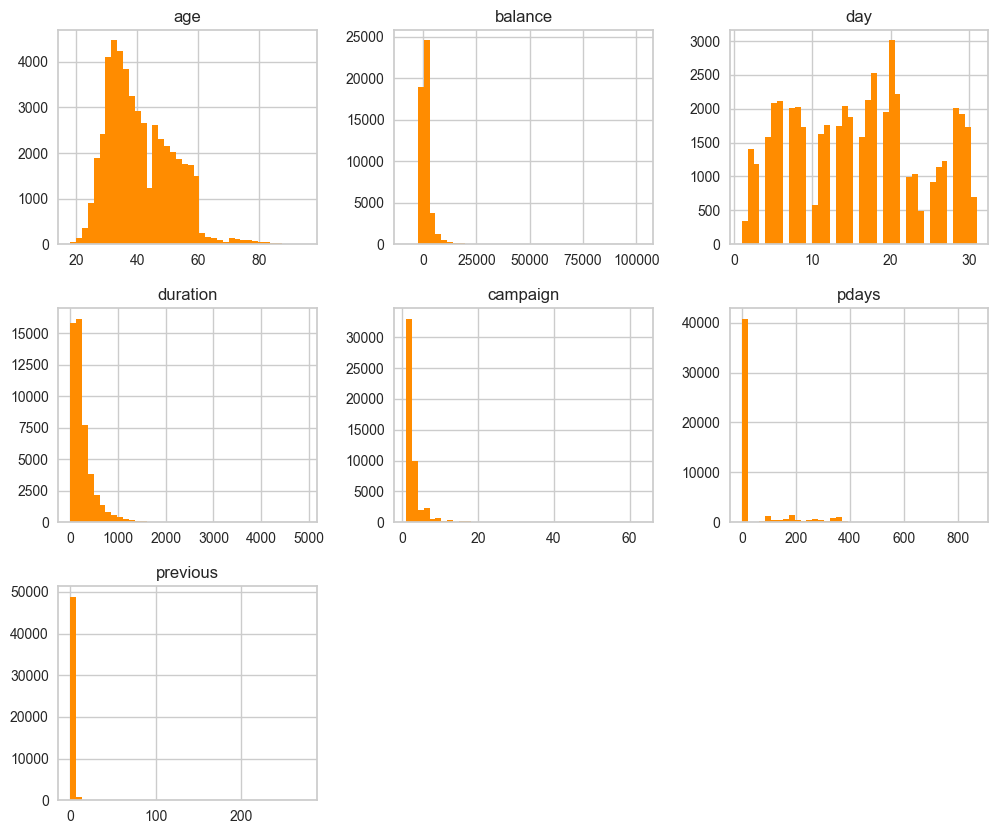

In [11]:
df.hist(bins=40, figsize = (12,10), color="darkorange")
plt.show()

### **2. Exploratory Data Analysis**
we'll know how majority people take or not deposit.

In [12]:
# make copy data for exploratory data analysis
df_eda = df.copy()

**- Defining Function**

In [13]:
# percentage of user say yes or no
def deposit_percentage(data, column):
    # group the DataFrame by the specified column and the "deposit" column
    grouped = data.groupby([column, "y"])["y"].count().unstack()

    # calculate the percentage of "yes" and "no" values for each group
    grouped["yes_pct"] = (grouped["yes"] / grouped.sum(axis=1))*100
    grouped["no_pct"] = (grouped["no"] / grouped.sum(axis=1))*100

    # create a new DataFrame with the percentage values
    result = grouped[["yes_pct", "no_pct"]] 


    return result

In [14]:
# function for categorical graph
def categorical_graph(source):

    # create canvas
    plt.figure(figsize=(6,3))
    
    # create bar graph
    ax = source["yes_pct"].plot(kind="bar", color="blue", alpha=0.7)
    ax.bar_label(
        # selecting bar
        container = ax.containers[0], 
        # convert numpy array to list
        labels = [round(x, 2) for x in source["yes_pct"].values])

    # create title
    plt.title(source.index.name.capitalize(), fontsize=13)

    # create x and y label 
    plt.ylabel("Percent Take Deposit (%)")
    plt.xlabel(None)

    # create grid
    plt.grid(True, alpha = 0.4, linewidth = 0.5)

    # rotate the x values
    plt.xticks(rotation=60)
    
    plt.show()

#### **2.1 Categorical**

**a. job** <br>
grouping job to see how people with different jobs respond the deposit.

In [15]:
# categorize job
grouping_job = {
    'management': 'white-collar',
    'technician': 'blue-collar',
    'entrepreneur': 'white-collar',
    'blue-collar': 'blue-collar',
    'retired': 'retired',
    'admin.': 'white-collar',
    'services': 'blue-collar',
    'self-employed': 'white-collar',
    'unemployed': 'unemployed',
    'housemaid': 'blue-collar',
    'student': 'student',
    'unknown':'unknown'
} 


# change the value
df_eda["job"] = df_eda["job"].map(grouping_job)

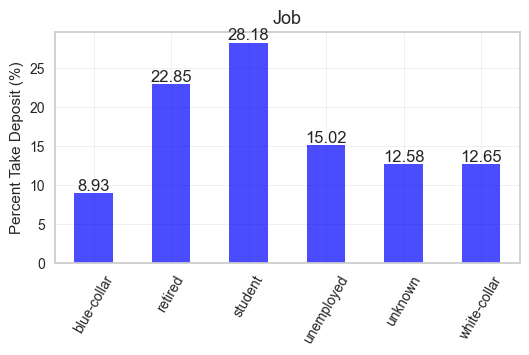

y                no   yes
job                      
blue-collar   22736  2230
retired        1924   570
student         734   288
unemployed     1216   215
unknown         285    41
white-collar  17027  2466


In [16]:
job_features = deposit_percentage(df_eda, "job")
categorical_graph(job_features)
print(df_eda.groupby(["job", "y"])["y"].count().unstack())

**b. Marital Features** <br>
bank targeted more user with married condition rather than two others.

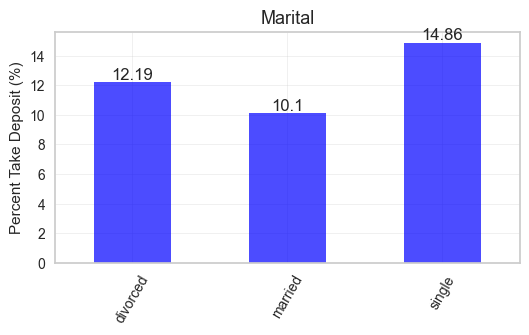

y            no   yes
marital              
divorced   5036   699
married   26979  3032
single    11907  2079


In [17]:
marital_features = deposit_percentage(df_eda, "marital")
categorical_graph(marital_features)
print(df_eda.groupby(["marital", "y"])["y"].count().unstack())

**c. Education Features**

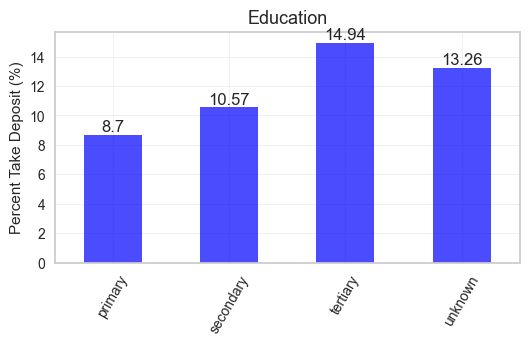

y             no   yes
education             
primary     6874   655
secondary  22813  2695
tertiary   12462  2189
unknown     1773   271


In [18]:
education_features = deposit_percentage(df_eda, "education")
categorical_graph(education_features)
print(df_eda.groupby(["education", "y"])["y"].count().unstack())

**d. Default Features (Has Credit)** 

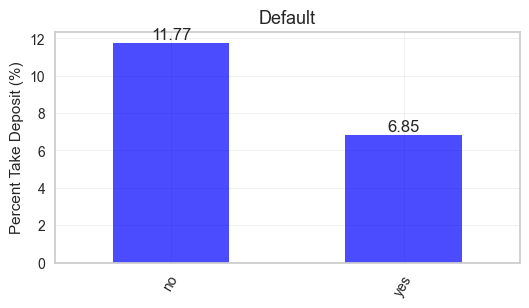

y           no   yes
default             
no       43092  5749
yes        830    61


In [19]:
default_features = deposit_percentage(df_eda, "default")
categorical_graph(default_features)
print(df_eda.groupby(["default", "y"])["y"].count().unstack())

**e. Housing Features (housing loan)**

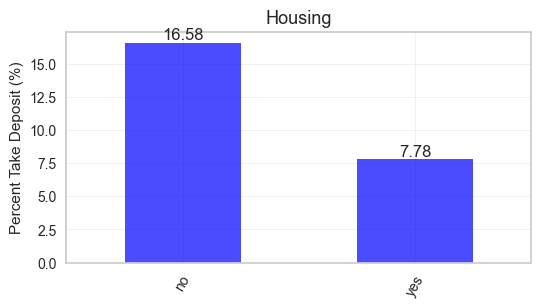

y           no   yes
housing             
no       18388  3655
yes      25534  2155


In [20]:
housing_features = deposit_percentage(df_eda, "housing")
categorical_graph(housing_features)
print(df_eda.groupby(["housing", "y"])["y"].count().unstack())

**f. Loan Features**

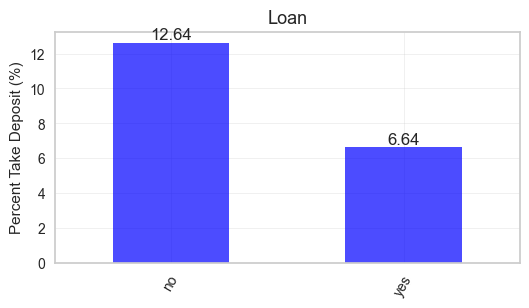

y        no   yes
loan             
no    36514  5283
yes    7408   527


In [21]:
loan_features = deposit_percentage(df_eda, "loan")
categorical_graph(loan_features)
print(df_eda.groupby(["loan", "y"])["y"].count().unstack())

**g. Contact Features**

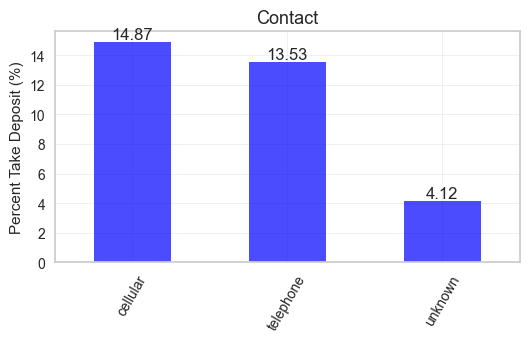

In [22]:
contact_features = deposit_percentage(df_eda, "contact")
categorical_graph(contact_features)

**h. poutcome Features**

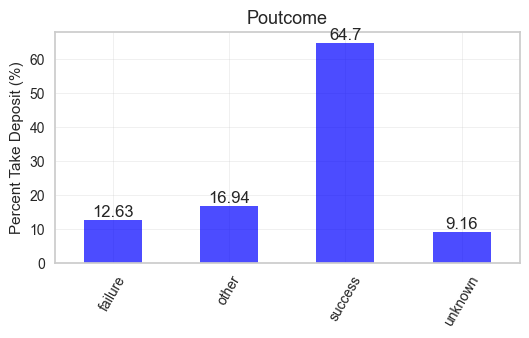

In [23]:
poutcome_features = deposit_percentage(df_eda, "poutcome")
categorical_graph(poutcome_features)

**i. Month Features**

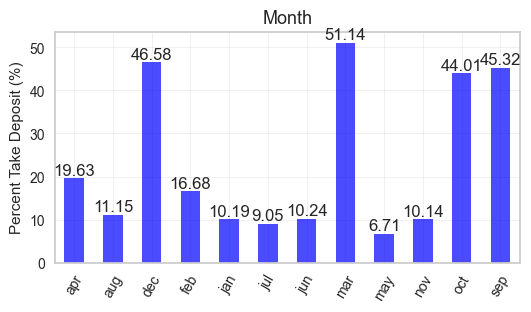

In [24]:
month_features = deposit_percentage(df_eda, "month")
categorical_graph(month_features)

##### **j. Age Category**

In [25]:
def convert_age(x):
    if x <= 20:
        return "<=20"
    elif x <= 30:
        return "<= 30"
    elif x <= 40:
        return "31-40"
    elif x <= 50:
        return "41-50"
    elif x <= 60:
        return "51-60"
    else:
        return "61+"

df_eda["age_cat"] = df_eda["age"].apply(convert_age)

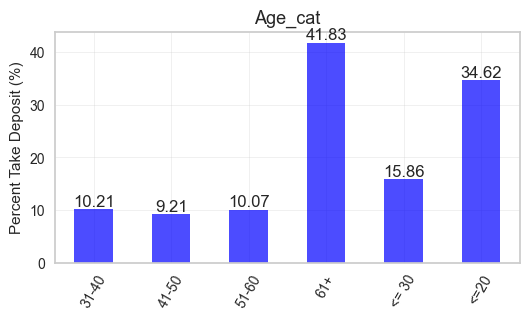

In [26]:
age_cat = deposit_percentage(df_eda, "age_cat")
categorical_graph(age_cat)

#### **2.2 Numerical**

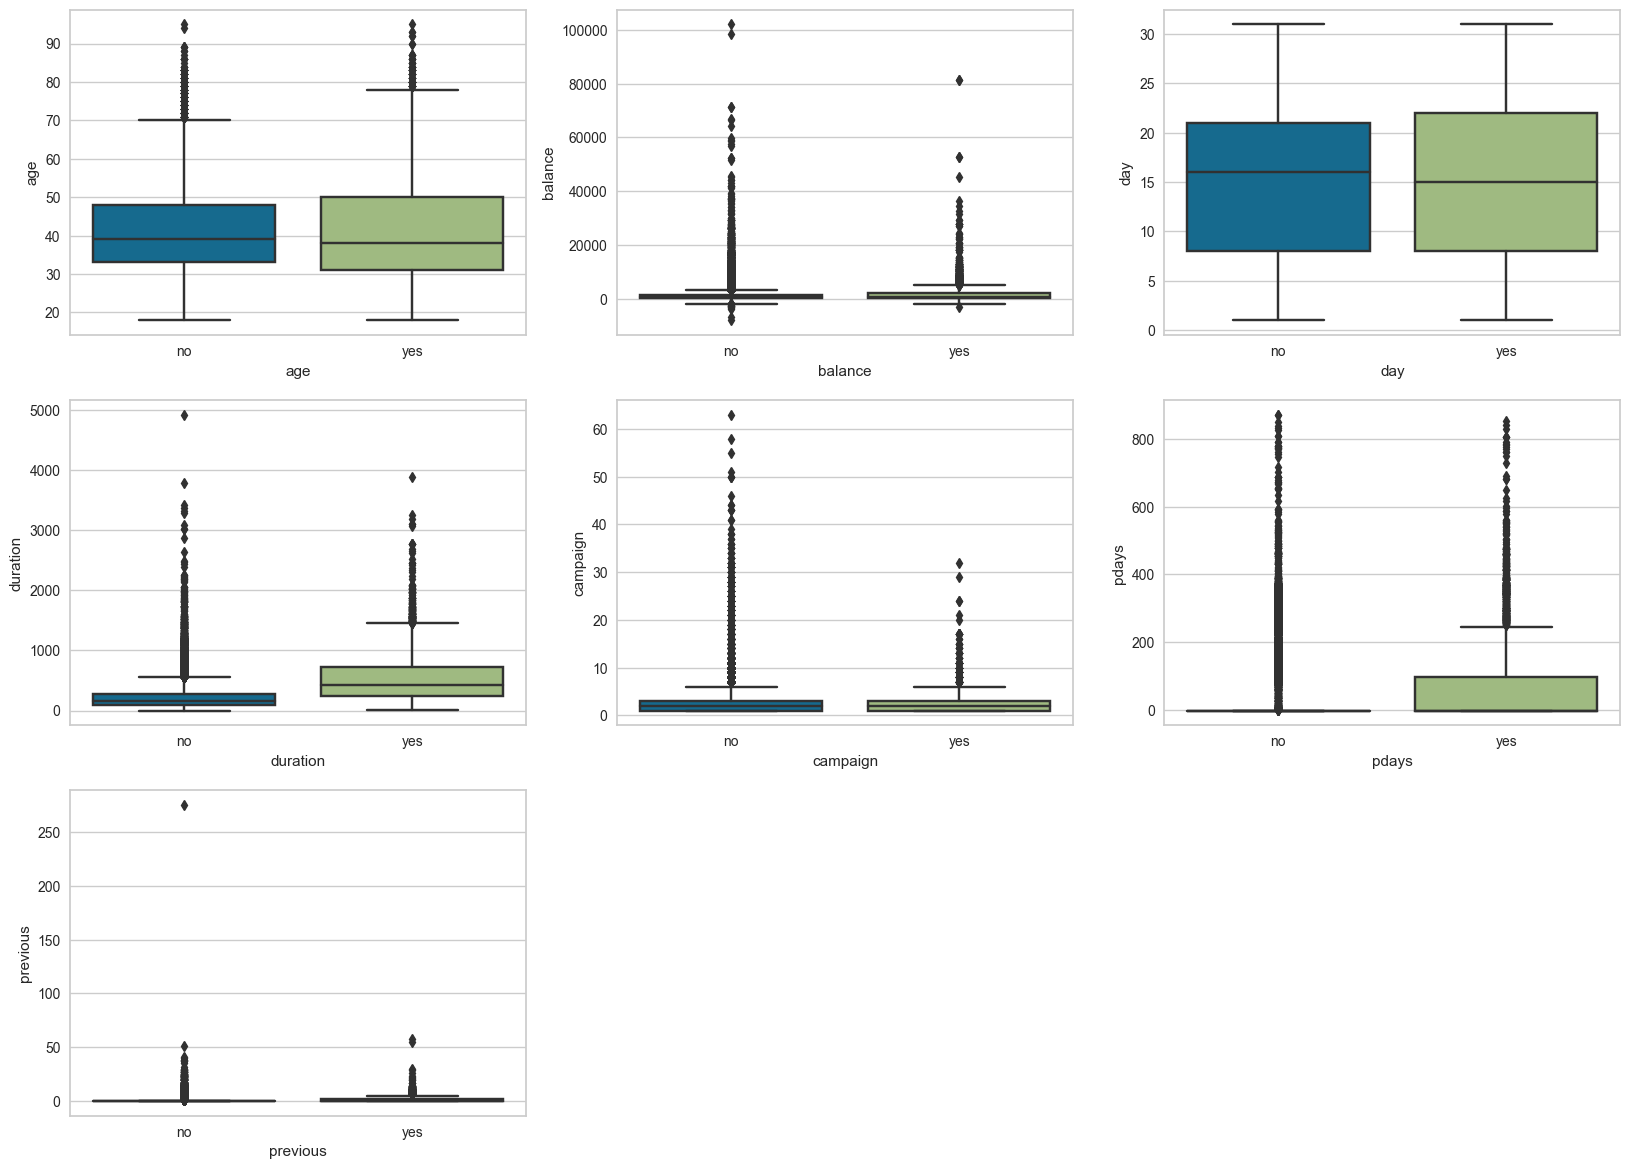

In [27]:
# boxplot to show distribution deposit among numerical columns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in df_eda[numerical_cols].columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df_eda[feature], data=df_eda)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

c:\Users\madii\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\madii\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\madii\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

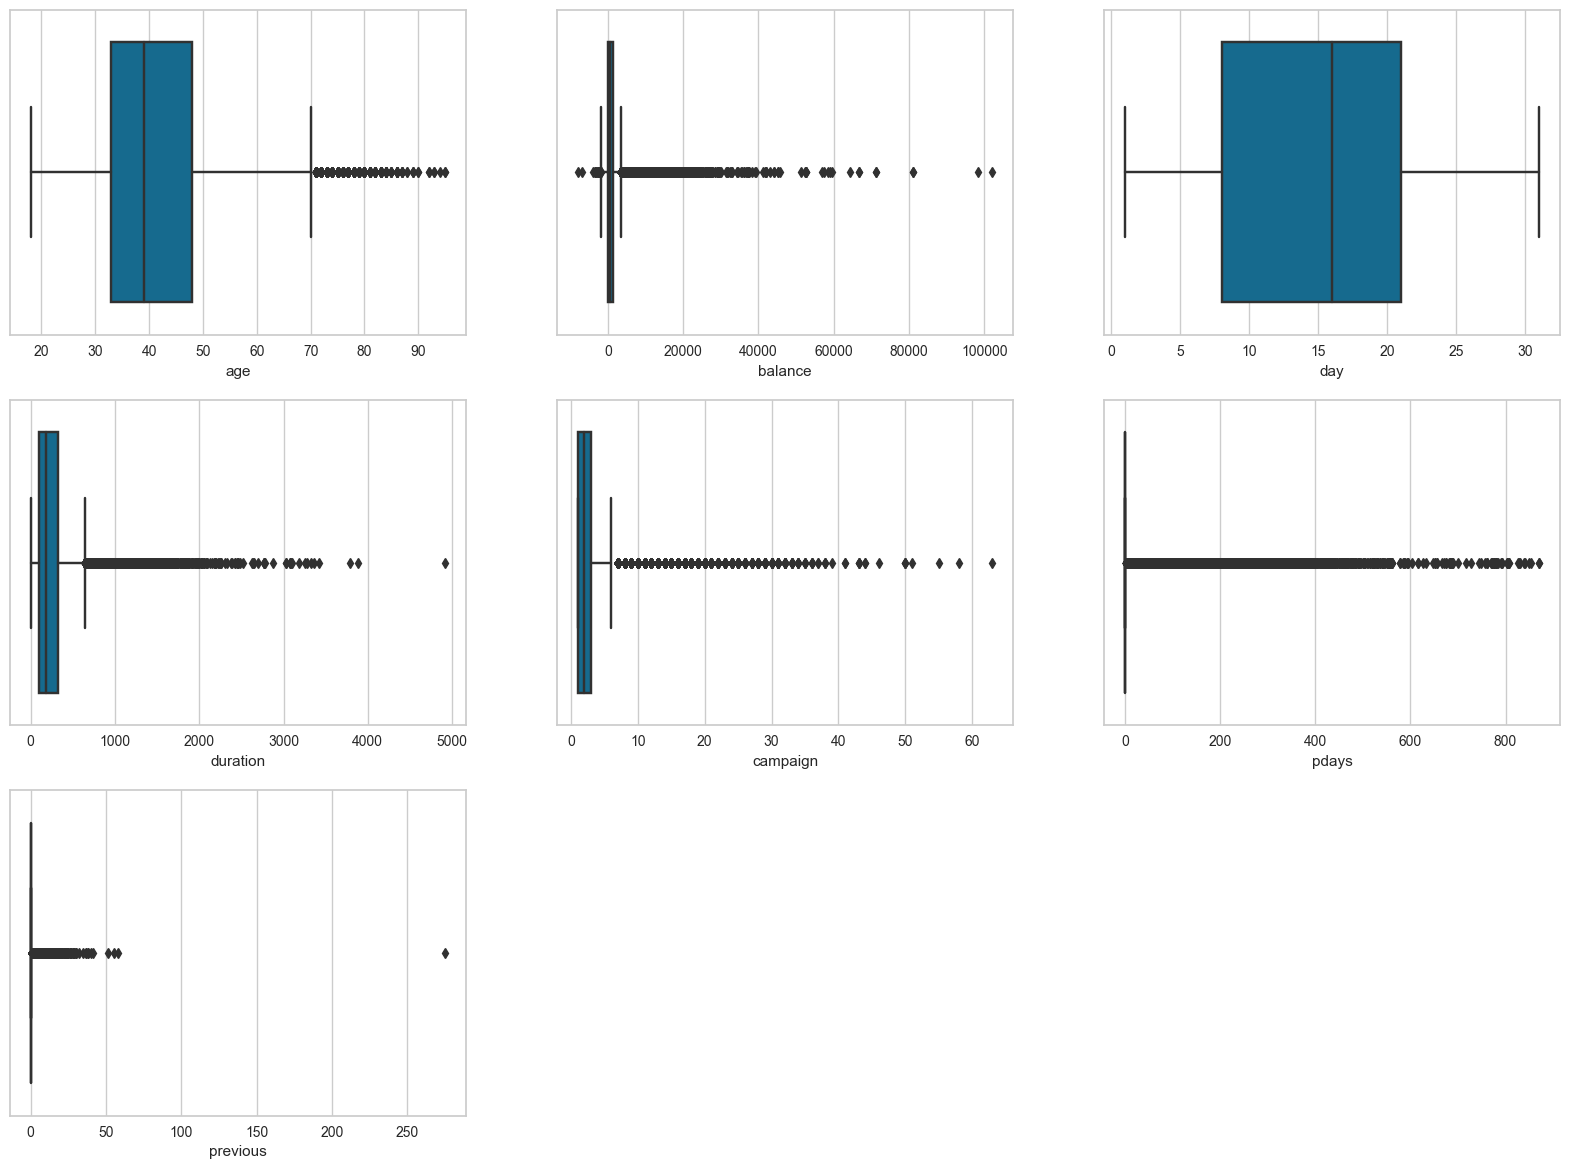

In [28]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_eda[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

there are outliers in numerical features. we need to look more in campaign, previous, duration.

#### **Summary Exploratory Data Analysis**

from above exporatory data analysis, we know how likely majority people take deposit. <br>
**majority people are likely to take a deposit under the following conditions**:
1. They don't have loan (can be any loan; loan, housing loan, credit `default`). People tend to take deposit with that conditions.
2. Marital status?; People tend to take deposit if they are single. Based on above exploratory data analysis, single and divorced are more likely to convert deposit.
3. Education? People tend to take deposit when they are have higher education. primary < secondary < tertiary.
4. Job? From above output; Students, retired, and unemployed take more higher rather tahn people have work.
5. People tend to take deposit if they are previously ever take deposit.
6. Age 61+ and below 20 are likely to take deposit.
 


### **3. Prepare the Data for Machine Learning Model**

#### **3.1 Data Cleaning**

**- Drop Duplicate**

In [29]:
# drop duplicatte
print("Length of Duplicate Data\t:", len(df[df.duplicated(keep="first")]))
df.drop_duplicates(keep="first", inplace=True)
print("Length of New Data\t\t:", df.shape[0])

Length of Duplicate Data	: 4521
Length of New Data		: 45211


**- Missing Value** `unknown` : job, education, contact, poutcome.

In [30]:
# use mode() for unknown value in job and education
df["job"].replace(["unknown"], df["job"].mode(), inplace=True)
df["education"].replace(["unknown"], df["education"].mode(), inplace=True)

In [31]:
# 'unknwon' value will be change with 'other'
df["poutcome"].replace(["unknown"], "other", inplace=True)
print(df.groupby(["poutcome", "y"])["y"].count().unstack())

y            no   yes
poutcome             
failure    4283   618
other     35106  3693
success     533   978


`the description data says that most effective are call. but there are lot of ways bank contact their customers, for example: email. so, i categorize call, the rest will be other.`

In [32]:
# unknown value will be other, cellular, contat will be call
df["contact"] = df["contact"].map({"cellular":"call", "telephone":"call", "unknown":"other"})
print(df.groupby(["contact", "y"])["y"].count().unstack())

y           no   yes
contact             
call     27432  4759
other    12490   530


**- Handling Outliers data** `outliers data will be treat using scaling, later.`<br>
- `duration`
- `previous`
- `campaign` <br>
will be treated using scaling.

In [33]:
# campaign, previous, duration
# drop previous more than 70
df = df.loc[df["previous"] <= 70]


### **4. Build Machine Learning Model**

In [34]:
# make copy data for Machine Learning Model
df_unengineer = df.copy()

In [35]:
# convert ordinal values to number
df_unengineer['month'] = df_unengineer['month'].map({'jan':1, 'feb':2, 'mar':3,
                               'apr':4, 'may':5, 'jun':6,
                               'jul':7, 'aug':8, 'sep':9,
                               'oct':10, 'nov':11, 'dec':12})

In [36]:
# convert binary values to number
df_unengineer['default'] = df_unengineer['default'].map({'yes': 1, 'no': 0})
df_unengineer['housing'] = df_unengineer['housing'].map({'yes': 1, 'no': 0})
df_unengineer['loan'] = df_unengineer['loan'].map({'yes': 1, 'no': 0})

**before feature engineering**

In [37]:
# create test set
X = df_unengineer.drop("y", axis=1)
y = df_unengineer["y"].replace(["yes", "no"], [1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

In [38]:
# build pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['balance', 'previous','pdays', 'campaign', 'duration']),
    ('cat', categorical_transformer, ['job', 'marital', 'contact', 'poutcome']),
    ('ordinal', ordinal_transformer, ['education'])
], remainder="passthrough")

In [39]:
imbalance_model = Pipeline([
    ("preprocess", preprocessor),
    ("ml_model", RandomForestClassifier(random_state= 42, 
                                        n_estimators=250,
                                        max_depth = None, 
                                        min_samples_split=3,
                                        max_features='log2',
                                        class_weight="balanced"))
])

imbalance_model.fit(X_train, y_train)
ypred_imbalance = imbalance_model.predict(X_test)
print(classification_report(y_test, ypred_imbalance))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3992
           1       0.64      0.37      0.47       529

    accuracy                           0.90      4521
   macro avg       0.78      0.67      0.71      4521
weighted avg       0.89      0.90      0.89      4521



In [40]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ros)

array([35929, 35929], dtype=int64)

In [41]:
balance_model = Pipeline([
    ("preprocess", preprocessor),
    ("ml_model", RandomForestClassifier(random_state= 42, 
                                        n_estimators=250,
                                        max_depth = None, 
                                        min_samples_split=3,
                                        min_samples_leaf=1,
                                        max_features='log2'))
])

balance_model.fit(X_train_ros, y_train_ros)
ypred_balance = balance_model.predict(X_test)
print(classification_report(y_test, ypred_balance))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3992
           1       0.59      0.48      0.53       529

    accuracy                           0.90      4521
   macro avg       0.76      0.72      0.74      4521
weighted avg       0.89      0.90      0.90      4521



##### **4.1 Feature Engineering**

In [42]:
df_engineer = df.copy()

In [43]:
# convert binary values to number
df_engineer['default'] = df_engineer['default'].map({'yes': 1, 'no': 0})
df_engineer['housing'] = df_engineer['housing'].map({'yes': 1, 'no': 0})
df_engineer['loan'] = df_engineer['loan'].map({'yes': 1, 'no': 0})

In [44]:
# convert ordinal values to number
df_engineer['month'] = df_engineer['month'].map({'jan':1, 'feb':2, 'mar':3,
                               'apr':4, 'may':5, 'jun':6,
                               'jul':7, 'aug':8, 'sep':9,
                               'oct':10, 'nov':11, 'dec':12})

In [45]:
# categorize job
grouping_job = {
    'management': 'white-collar',
    'technician': 'blue-collar',
    'entrepreneur': 'white-collar',
    'blue-collar': 'blue-collar',
    'retired': 'retired',
    'admin.': 'white-collar',
    'services': 'blue-collar',
    'self-employed': 'white-collar',
    'unemployed': 'unemployed',
    'housemaid': 'blue-collar',
    'student': 'student',
} 


# change the value
df_engineer["job_cat"] = df_engineer["job"].map(grouping_job)

In [46]:
def convert_age(x):
    if x <= 20:
        return "<=20"
    elif x <= 30:
        return "<= 30"
    elif x <= 40:
        return "31-40"
    elif x <= 50:
        return "41-50"
    elif x <= 60:
        return "51-60"
    else:
        return "61+"

df_engineer["age_cat"] = df_engineer["age"].apply(convert_age)

In [47]:
# balance convert
verylow = df_engineer["balance"].quantile(0.2)
low = df_engineer["balance"].quantile(0.4)
mid = df_engineer["balance"].quantile(0.6)
high = df_engineer["balance"].quantile(0.8)
def balance_convert(x):
    if x <= verylow:
        return "very low"
    elif x <= low:
        return "low"
    elif x <= mid:
        return "mid"
    elif x <= high:
        return "high"
    else:
        return "very high"

df_engineer["balance_cat"] = df_engineer["balance"].apply(balance_convert)


<AxesSubplot:>

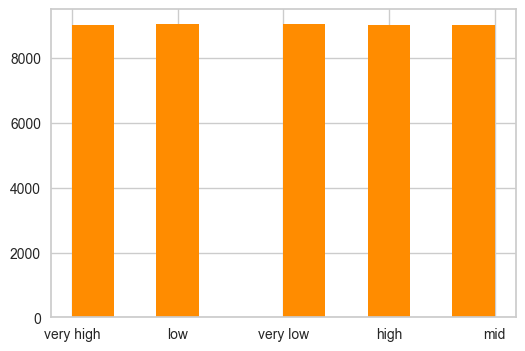

In [48]:
# df['balance'].hist()
plt.figure(figsize=(6, 4))
df_engineer['balance_cat'].hist(color="darkorange")

making this `balance_cat` can make splitting data more balance. since we know, balance is important features to consider. 

In [49]:
def bin_campaign (x) :
    if x<=3 :
        return '1-3'
    elif x<=6 :
        return '4-6'
    else :
        return '7+'
    
df_engineer["campaign_cat"] = df_engineer["campaign"].apply(bin_campaign)


#### **4.2 Create Test Set**

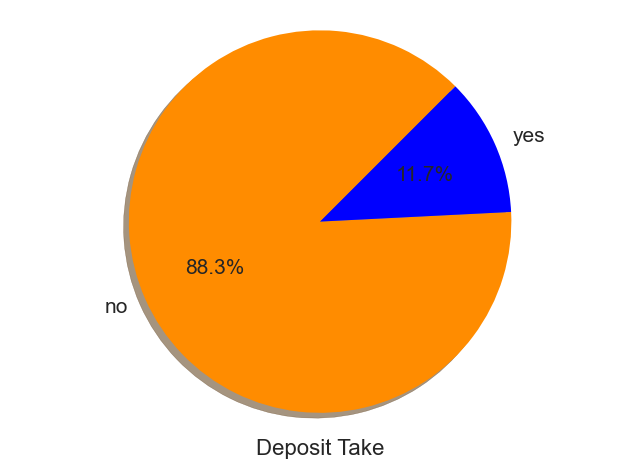

In [50]:
deposit = df_engineer["y"].value_counts()

colors = ["darkorange", "blue"]  # set colors for "no" and "yes" bars

plt.pie(deposit.values, labels=['no','yes'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={"fontsize": 15})

plt.xlabel("Deposit Take",fontsize=16)
plt.axis("equal")
plt.show()


In [51]:
# balance is important features, the distribution also not quite normal.
# we split data using balance category
train_data, test_data = train_test_split(df_engineer, 
                                         random_state=42, 
                                         test_size=0.1, 
                                         stratify=df_engineer[['y', 'balance_cat']] 
                                         )
# train
X_train = train_data.drop(['y'], axis=1)
y_train = train_data['y'].replace(['yes', 'no'], [1,0])

# test
X_test = test_data.drop(['y'], axis=1)
y_test = test_data['y'].replace(['yes', 'no'], [1,0])

##### **a. Make Pipeline for Handling Numeric and Categoric Columns**

In [52]:
# build pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]))
])

##### **b. Combine Pipeline Using Column Transformer**

In [53]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['balance', 'previous','pdays', 'campaign', 'duration']),
    ('cat', categorical_transformer, ['job', 'marital', 'contact', 'poutcome', 
                                      'age_cat', 'job_cat', 'campaign_cat', 'balance_cat']),
    ('ordinal', ordinal_transformer, ['education'])
], remainder="passthrough")


#### **Model Random Forest**

##### **- before handling imbalance dataset**

In [54]:
imbalance_model = Pipeline([
    ("preprocess", preprocessor),
    ("rf_model", RandomForestClassifier(random_state= 42, 
                                        n_estimators=250))
])

imbalance_model.fit(X_train, y_train)
ypred_imbalance = imbalance_model.predict(X_test)
print(classification_report(y_test, ypred_imbalance))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3991
           1       0.69      0.39      0.50       530

    accuracy                           0.91      4521
   macro avg       0.81      0.68      0.72      4521
weighted avg       0.90      0.91      0.90      4521



**- after handling imbalance dataset**

In [55]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ros)

array([35930, 35930], dtype=int64)

In [97]:
balance_model = Pipeline([
    ("preprocess", preprocessor),
    ("ml_model", RandomForestClassifier(random_state= 42, 
                                        n_estimators=250))
])

balance_model.fit(X_train_ros, y_train_ros)
ypred_balance = balance_model.predict(X_test)
print(classification_report(y_test, ypred_balance))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3991
           1       0.63      0.48      0.55       530

    accuracy                           0.91      4521
   macro avg       0.78      0.72      0.75      4521
weighted avg       0.90      0.91      0.90      4521



**- evaluation**

In [57]:
def eval_test (X,y,model) :
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    
    disp.plot()

 Recall Score : 0.4830188679245283
 Precision Score : 0.6274509803921569
 F1 Score : 0.5458422174840086
 ROC-AUC Score : 0.9252885029051213


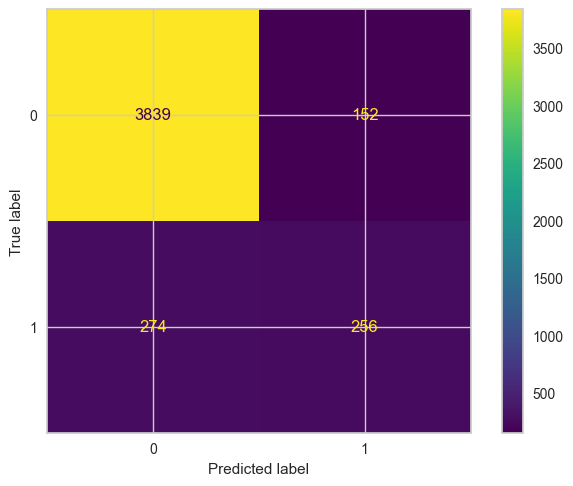

In [98]:
eval_test(X_test, y_test, balance_model)

**- Tuning Balanced Data**

In [96]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['balance', 'previous', 'pdays', 'campaign', 'duration']),
    ('cat', categorical_transformer, ['job', 'marital', 'contact', 'poutcome', 
                                      'age_cat', 'job_cat', 'campaign_cat', 'balance_cat']),
    ('ordinal', ordinal_transformer, ['education'])
], remainder="passthrough")

randomcv = Pipeline([
    ("preprocess", preprocessor),
    ("ml_model", RandomForestClassifier(random_state= 42))
])

parameters = {
            'ml_model__n_estimators': [100, 150, 200, 250],
            'ml_model__max_depth': [None, 10, 15, 20],
            'ml_model__min_samples_split': [2, 3, 4, 5],
            'ml_model__min_samples_leaf': [1, 2, 5, 7],
            'ml_model__max_features': ['sqrt', 'log2']
}

# precision_scorer = make_scorer(precision_score)
rf_tuning = RandomizedSearchCV(randomcv, param_distributions=parameters, cv = 3, verbose =1, 
                           n_jobs=-1, n_iter=50)
best_rf = rf_tuning.fit(X_train_ros, y_train_ros)
#after change it
y_tuning_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_tuning_rf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3991
           1       0.65      0.45      0.53       530

    accuracy                           0.91      4521
   macro avg       0.79      0.71      0.74      4521
weighted avg       0.90      0.91      0.90      4521



#### **4.3 Feature Importance**

Feature ranking:
1. duration (0.2306373504035625)
2. contact (0.06943640411912053)
3. marital (0.06289590871138326)
4. housing (0.058959087113832465)
5. poutcome (0.04574172001113279)
6. month (0.03791260784859453)
7. balance_cat (0.028197884775953273)
8. balance (0.021351238519343185)
9. job (0.018583356526579477)
10. age_cat (0.017577233509602018)
11. day (0.012474255496799347)
12. age (0.00933064291678266)
13. job_cat (0.009158085165599805)
14. campaign (0.008998051767325366)
15. campaign_cat (0.00791399944336212)
16. pdays (0.007319788477595357)
17. loan (0.005327024770386879)
18. education (0.003300862788755943)
19. previous (0.003106039521291426)
20. default (0.00017812413025328767)


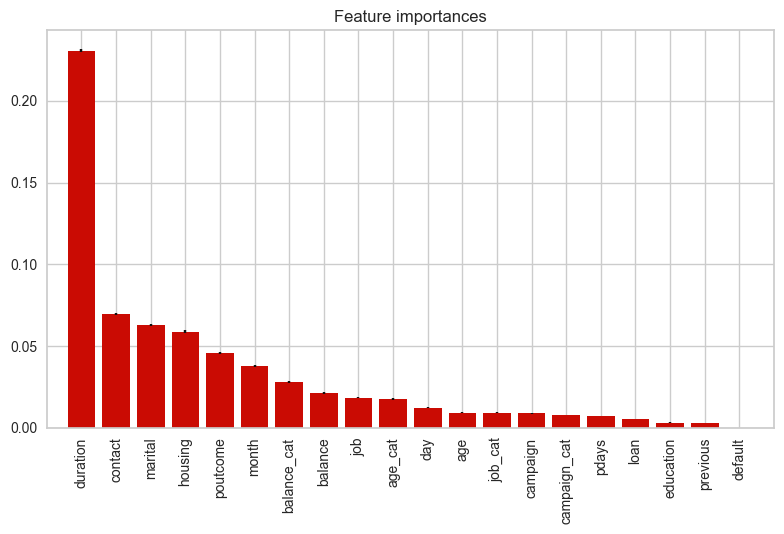

In [60]:
from sklearn.inspection import permutation_importance
# Calculate feature importances
result = permutation_importance(rf_tuning, X_train_ros, y_train_ros, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train_ros.shape[1]):
    print(f"{f+1}. {X_train_ros.columns[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_ros.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_ros.shape[1]), X_train_ros.columns[indices], rotation=90)
plt.xlim([-1, X_train_ros.shape[1]])
plt.tight_layout()
plt.show()


#### **4.4 Feature Selection**

In [69]:
# best parameter after tuning
print(best_rf.best_params_)

{'ml_model__n_estimators': 300, 'ml_model__min_samples_split': 5, 'ml_model__min_samples_leaf': 1, 'ml_model__max_features': 'log2', 'ml_model__max_depth': 30}


In [81]:
# change it matching
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['balance','pdays', 'campaign', 'duration']),
    ('cat', categorical_transformer, ['job', 'marital', 'contact', 'poutcome', 
                                      'age_cat', 'job_cat', 'campaign_cat']),
    ('ordinal', ordinal_transformer, ['education'])
], remainder="passthrough")

new_model = Pipeline([
    ("preprocess", preprocessor),
    ("ml_model", RandomForestClassifier(random_state= 42, 
                                        n_estimators=250,
                                        max_depth = None, 
                                        min_samples_split=3,
                                        min_samples_leaf=1,
                                        max_features='log2'))
])

# defining new train and test with droping features
X_train_new = X_train_ros.drop(['default', 'balance_cat', 'previous'], axis=1)
X_test_new = X_test.drop(['default', 'balance_cat', 'previous'], axis=1)

new_model.fit(X_train_new, y_train_ros)
y_rf_new = new_model.predict(X_test_new)
print(classification_report(y_test, y_rf_new))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3991
           1       0.65      0.47      0.55       530

    accuracy                           0.91      4521
   macro avg       0.79      0.72      0.75      4521
weighted avg       0.90      0.91      0.90      4521



**- Final Model** 

 Recall Score : 0.47358490566037736
 Precision Score : 0.6502590673575129
 F1 Score : 0.5480349344978166
 ROC-AUC Score : 0.9249147846806258


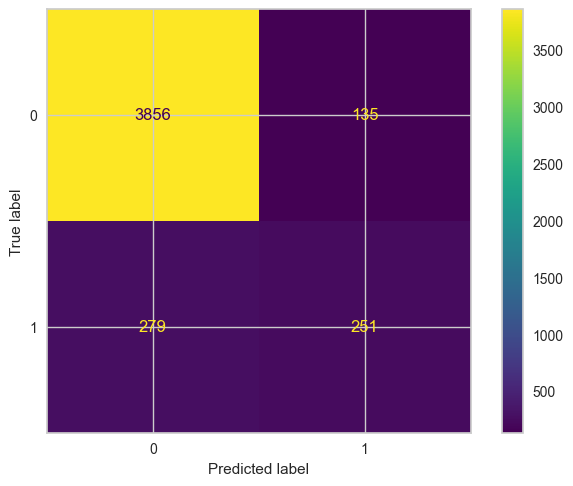

In [72]:
eval_test(X_test.drop(['default', 'balance_cat', 'previous'], axis=1), y_test, new_model)

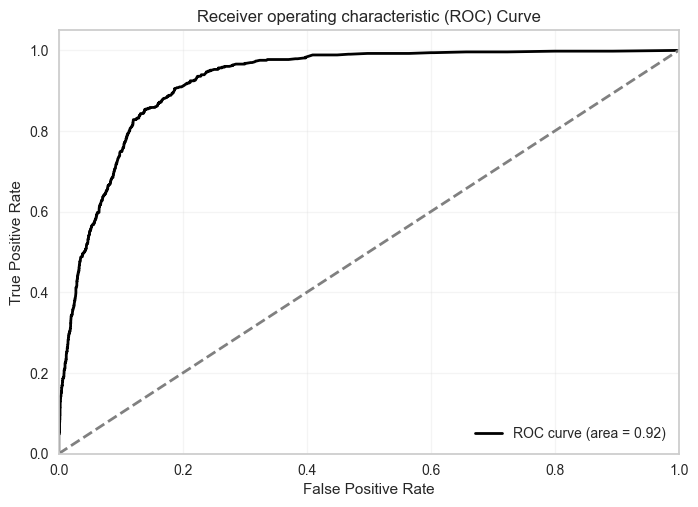

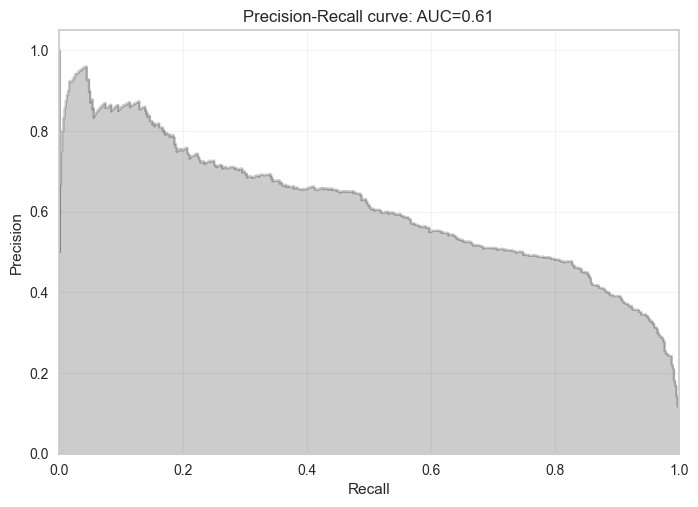

In [92]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = new_model.predict_proba(X_test.drop(['default', 'balance_cat', 'previous'], axis=1))[:,1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='black', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(alpha=0.2)
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


#### **Model Logistic Regression**

In [75]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['balance', 'previous', 'pdays', 'campaign', 'duration']),
    ('cat', categorical_transformer, ['job', 'marital', 'contact', 'poutcome', 
                                      'age_cat', 'job_cat', 'campaign_cat', 'balance_cat']),
    ('ordinal', ordinal_transformer, ['education'])
], remainder="passthrough")

In [76]:
lr = Pipeline([
    ("preprocess", preprocessor),
    ("lore_model", LogisticRegression(random_state=42, C=3, solver="liblinear", class_weight="balanced"))
])

lr.fit(X_train, y_train)
ylr = lr.predict(X_test)
print(classification_report(y_test, ylr))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3991
           1       0.40      0.79      0.53       530

    accuracy                           0.84      4521
   macro avg       0.68      0.82      0.71      4521
weighted avg       0.90      0.84      0.86      4521



##### **- balanced model logistic regression** 

In [77]:
lr1 = Pipeline([
    ("preprocess", preprocessor),
    ("lore_model", LogisticRegression(random_state=42, C= 3, 
                                      solver="liblinear"))
])

lr1.fit(X_train_ros, y_train_ros)
ylr1 = lr1.predict(X_test)
print(classification_report(y_test, ylr1))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3991
           1       0.40      0.80      0.53       530

    accuracy                           0.84      4521
   macro avg       0.69      0.82      0.72      4521
weighted avg       0.90      0.84      0.86      4521



#### **Model Decision Tree**

In [78]:
dt = Pipeline([
    ("preprocess", preprocessor),
    ("dt", DecisionTreeClassifier(max_depth=5,
                                  min_samples_split=20, 
                                  min_samples_leaf=20,
                                  max_features=None))
])

dt.fit(X_train_ros, y_train_ros)
ydt = dt.predict(X_test)
print(classification_report(y_test, ydt))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3991
           1       0.34      0.83      0.48       530

    accuracy                           0.79      4521
   macro avg       0.66      0.81      0.68      4521
weighted avg       0.90      0.79      0.82      4521



### **Summary**

This model appears to be performing fairly well, as evidenced by the relatively high ROC-AUC score 92% that indicates `strong overall performance`. <br>
- Recall Score : 0.47358490566037736 <br>
- Precision Score : 0.6502590673575129 <br>
- F1 Score : 0.5480349344978166 <br>
- ROC-AUC Score : 0.9249147846806258 <br>

The model may be missing some occurrences of the positive class, though, given the recall score is relatively low. Also, the model may be yielding some false positives because the precision score is not as high as it could be.
There is still room for improving precision and recall score. This is not the best solution, but it's better perform to handle imbalanced data.